<a href="https://colab.research.google.com/github/Prerana-Bijekar/ML/blob/main/Practical-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load the dataset
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("E-commerce.csv")
df.head()

Saving E-commerce.csv to E-commerce (1).csv


,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


In [5]:
# Function to extract number of purchases from Purchase History
def extract_purchase_count(purchase_history):
    try:
        purchases = json.loads(purchase_history.replace("'", "\""))
        return len(purchases) if isinstance(purchases, list) else 1
    except:
        return 0

# Function to extract number of browsed items from Browsing History
def extract_browsing_count(browsing_history):
    try:
        history = json.loads(browsing_history.replace("'", "\""))
        return len(history) if isinstance(history, list) else 1
    except:
        return 0

In [6]:
# Apply feature extraction functions
df['Purchase Count'] = df['Purchase History'].apply(extract_purchase_count)
df['Browsing Count'] = df['Browsing History'].apply(extract_browsing_count)

# Encoding categorical variables
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])


In [7]:
# Defining features and target variable
X = df[['Age', 'Gender', 'Location', 'Annual Income', 'Time on Site', 'Purchase Count', 'Browsing Count']]
y = (df['Purchase Count'] > 0).astype(int)  # Binary target: 1 if purchase made, 0 otherwise

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building and training the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred = dt_model.predict(X_test)

In [8]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



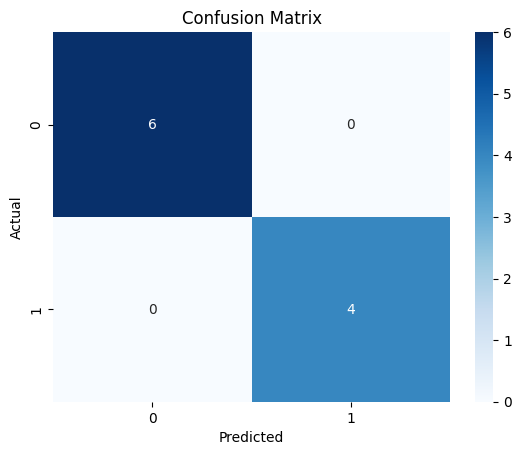

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

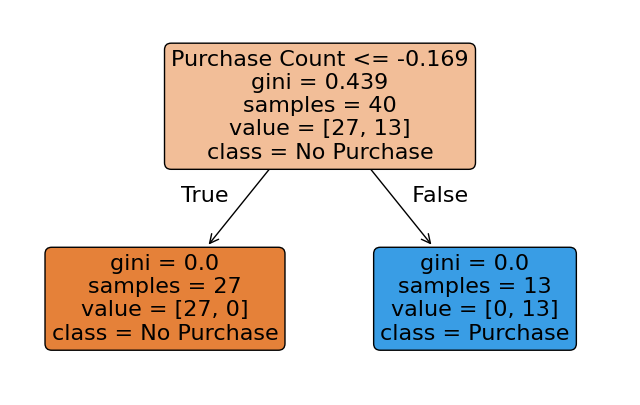

In [10]:
# Visualizing the Decision Tree
plt.figure(figsize=(8, 5))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True)
plt.show()